In [53]:
%load_ext autoreload
%autoreload

import pandas as pd
import numpy as np
import qgrid
import beakerx as bx
from datetime import datetime as dtt

from pa_lib.file import data_files, load_bin, store_bin, store_excel
from pa_lib.data import calc_col_partitioned, clean_up_categoricals, flatten, replace_col, cond_col, desc_col
from pa_lib.util import obj_size
from pa_lib.log  import time_log
from pa_lib.types import dtFactor

# display long columns completely
pd.set_option('display.max_colwidth', 200)

pd.set_option('display.max_rows', 200)

def sep_format(num):
    return format(num, ',d')
pd.set_option('display.float_format', sep_format)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data Setup

In [43]:
data_files('*.feather')

,size,mtime
name,,
bd_by_week.feather,87.0 MB,27.06.19 10:24:40
bd_data.feather,203.8 MB,27.06.19 09:27:37
bd_data_raw.feather,336.9 MB,27.06.19 09:27:28
bd_data_vkprog.feather,72.2 MB,27.06.19 09:27:40
bd_ek_minmax.feather,1.5 MB,27.06.19 10:29:09
bd_long_by_week.feather,9.3 MB,27.06.19 10:28:13
crm_data.feather,52.8 MB,27.06.19 09:07:53
crm_data_vkprog.feather,43.1 MB,27.06.19 09:07:55
plz_data.feather,135.7 KB,27.06.19 09:06:06


In [5]:
bd = load_bin('bd_data.feather')

2019-06-27 09:41:38 [INFO] Reading from file /home/pa/data/bd_data.feather
2019-06-27 09:41:38 [INFO] Finished loading binary file in 0.25s (0.66s CPU)


In [6]:
desc_col(bd, det=True)

,DTYPE,NULLS,UNIQUE,MEM,RANGE
ENDKUNDE_NR,category,0/1524392,41717,7.4 MB,"[100034,656817]"
ENDKUNDE,category,0/1524392,39099,10.1 MB,"[ IWIKO - Institut für Wirtschafts-Komm.,ô quai des arts]"
EK_ABC,category,5389/1519003,8,1.5 MB,"[nan,NO]"
EK_BONI,category,2408/1521984,3,1.5 MB,"[nan,keine Verkäufe]"
EK_PLZ,category,398/1523994,3468,3.3 MB,"[nan,WC2H OBA 1]"
EK_ORT,category,397/1523995,3504,3.3 MB,"[nan,genève]"
EK_LAND,category,397/1523995,60,1.5 MB,"[nan,USA]"
EK_HB_APG_KURZZ,category,67229/1457163,95,1.5 MB,"[nan,YIL]"
EK_AKTIV,category,0/1524392,2,1.5 MB,"[0,1]"
AGENTUR,category,769503/754889,4602,3.4 MB,"[nan,Österreich Werbung]"


#### Filtered data: Only above-zero

In [7]:
bd = bd.loc[(bd.NETTO >= 0)].pipe(clean_up_categoricals)

#### Reduced data: Only from 2014

In [8]:
data = bd.loc[(bd.KAMP_ERFASS_JAHR > 2014)].pipe(clean_up_categoricals)

### Set up plotting

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.dpi'] = 90
plt.rcParams['figure.figsize'] = [15, 10]

### Plots

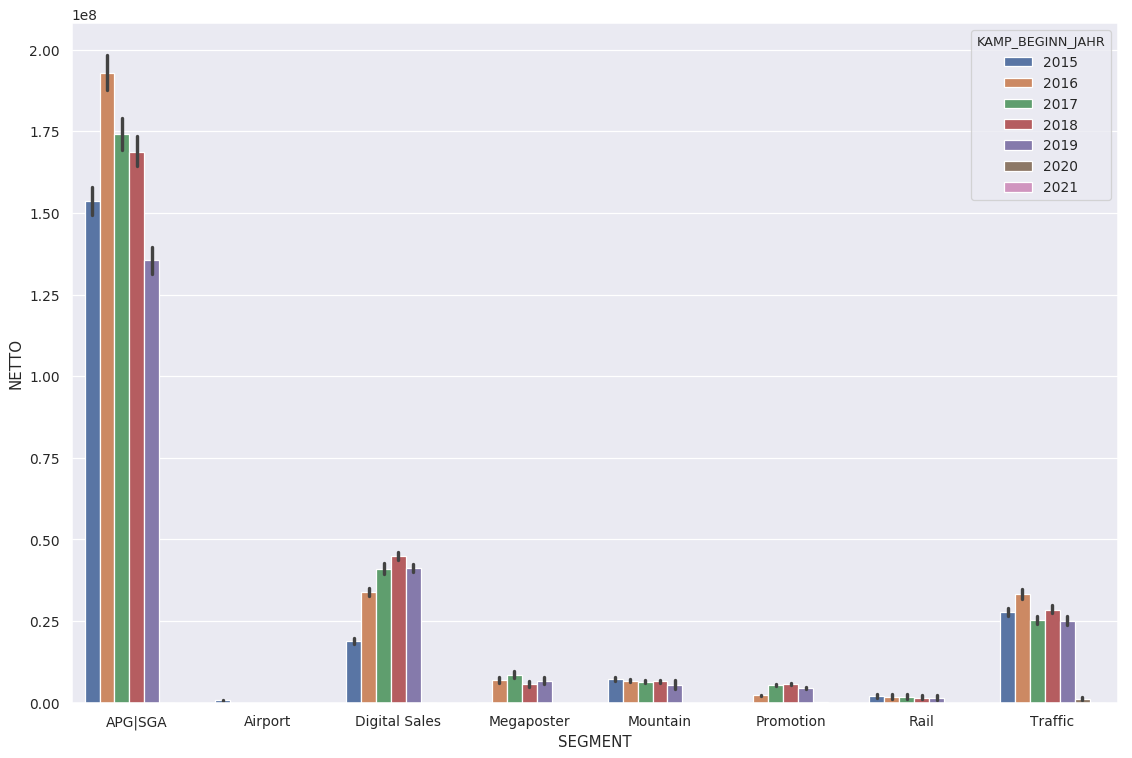

In [11]:
sns.barplot(data=data, x="SEGMENT", y="NETTO", hue='KAMP_BEGINN_JAHR', estimator=np.sum)

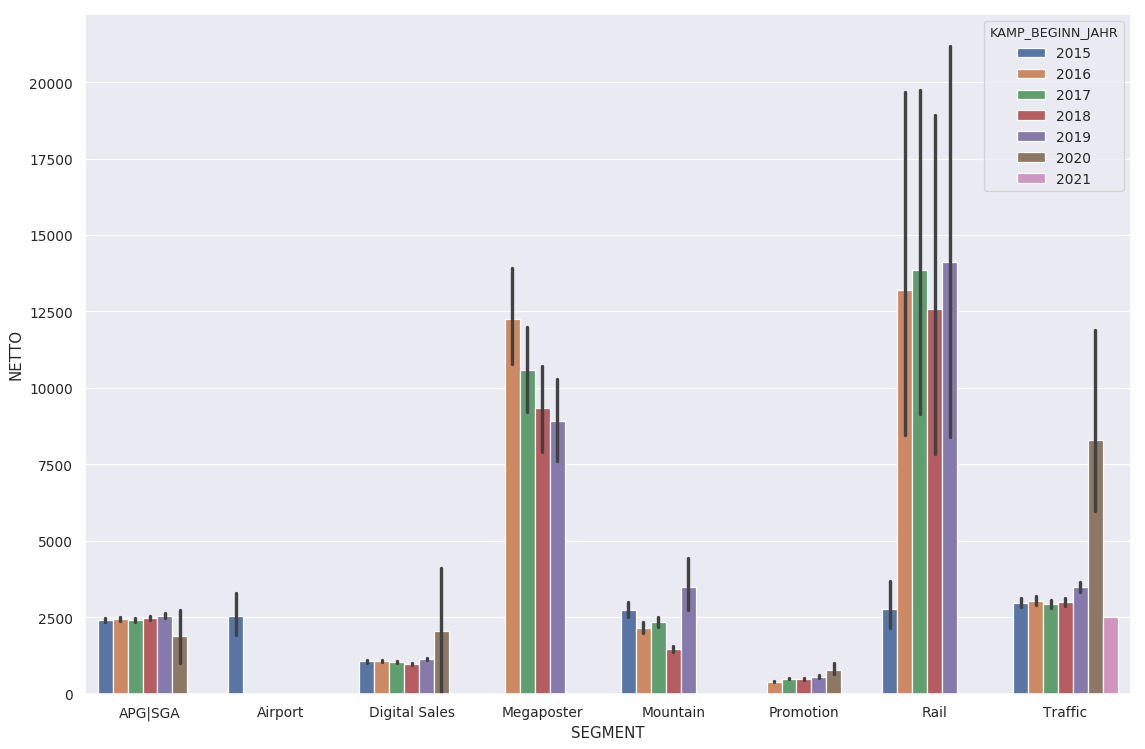

In [12]:
sns.barplot(data=data, x="SEGMENT", y="NETTO", hue='KAMP_BEGINN_JAHR', estimator=np.mean)

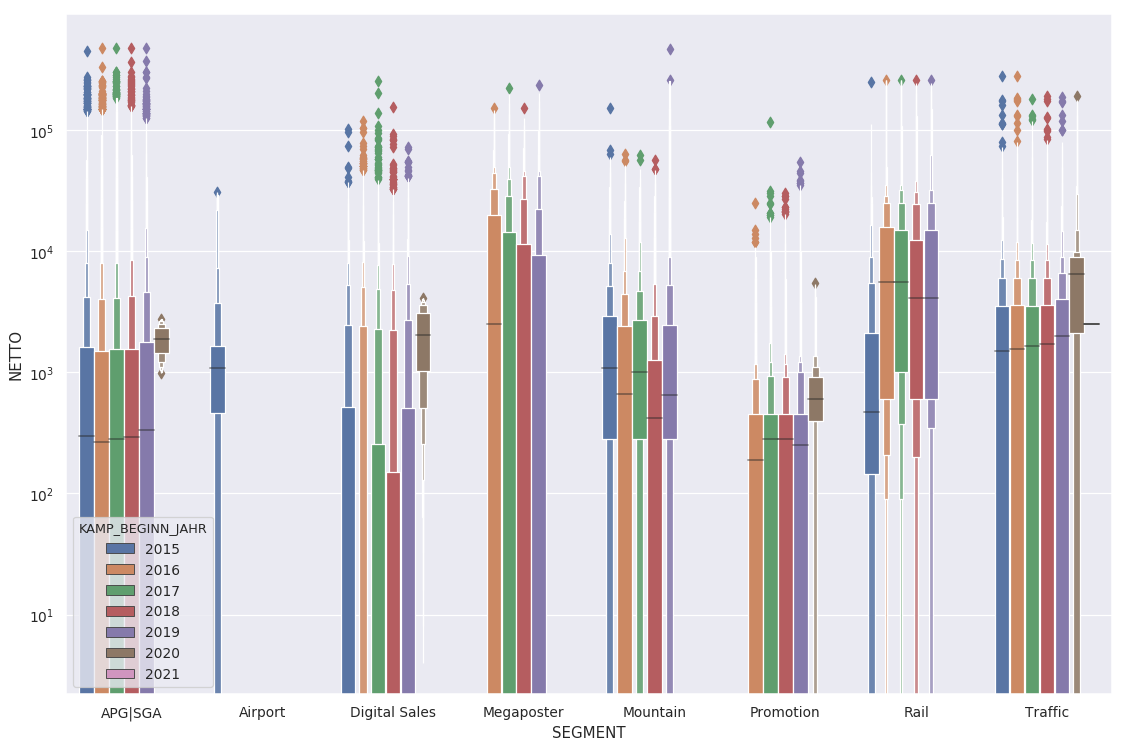

In [13]:
plt.yscale('log')
sns.boxenplot(data=data, x='SEGMENT', y='NETTO', hue='KAMP_BEGINN_JAHR')

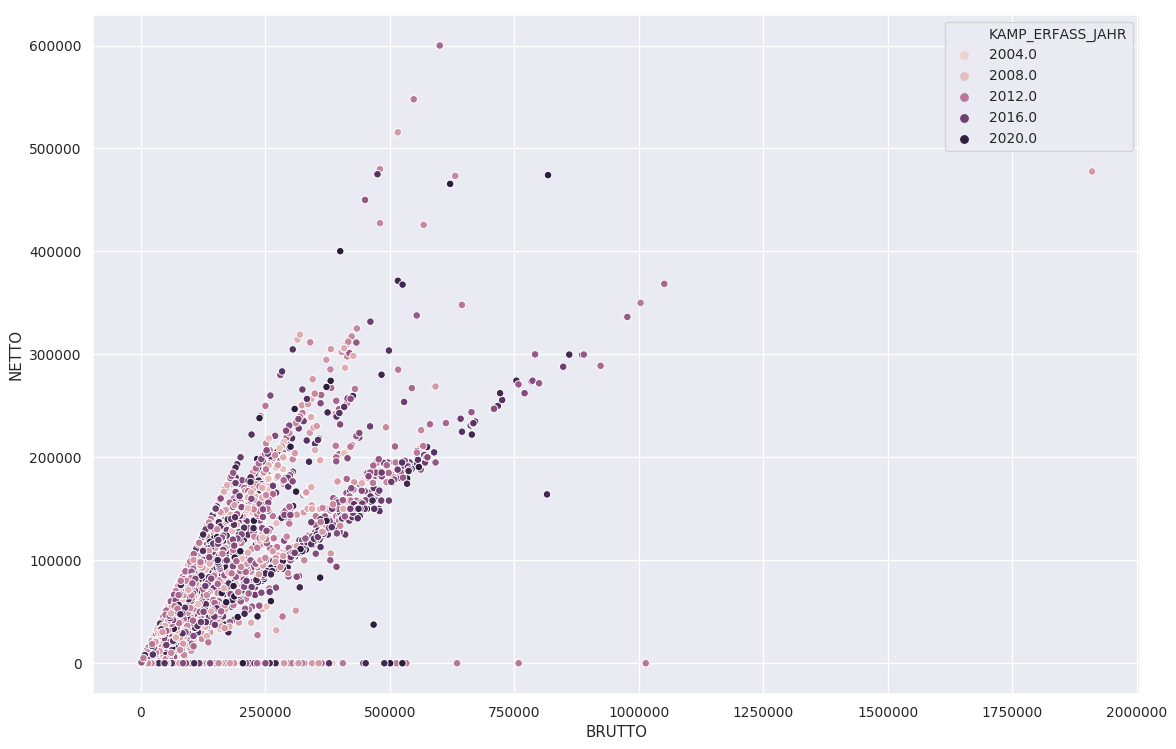

In [14]:
sns.scatterplot(x=bd.BRUTTO, y=bd.NETTO, hue=bd.KAMP_ERFASS_JAHR.astype('float'))

In [15]:
qgrid.show_grid(bd.loc[bd.BRUTTO > 1000000].sort_values('BRUTTO', ascending=False).transpose())

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [16]:
desc_col(data, det=True)

,DTYPE,NULLS,UNIQUE,MEM,RANGE
ENDKUNDE_NR,category,0/774790,25021,28.2 MB,"[100034,656817]"
ENDKUNDE,category,0/774790,23750,29.9 MB,"[""Persönlich"" Verlags AG,ängelibeck]"
EK_ABC,category,26/774764,8,26.7 MB,"[nan,NO]"
EK_BONI,category,0/774790,3,26.7 MB,"[gegen Vorauszahlung,keine Verkäufe]"
EK_PLZ,category,161/774629,2798,27.6 MB,"[nan,WC2H OBA 1]"
EK_ORT,category,161/774629,2717,27.6 MB,"[nan,Zürich Mülligen]"
EK_LAND,category,161/774629,49,26.7 MB,"[nan,USA]"
EK_HB_APG_KURZZ,category,12964/761826,59,26.7 MB,"[nan,YAM]"
EK_AKTIV,category,0/774790,2,26.7 MB,"[0,1]"
AGENTUR,category,397270/377520,2477,27.7 MB,"[nan,Österreich Werbung]"


/home/pa/anaconda3/lib/python3.7/site-packages/seaborn/algorithms.py:70: RuntimeWarning: Mean of empty slice.
  return getattr(x, func)()
/home/pa/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


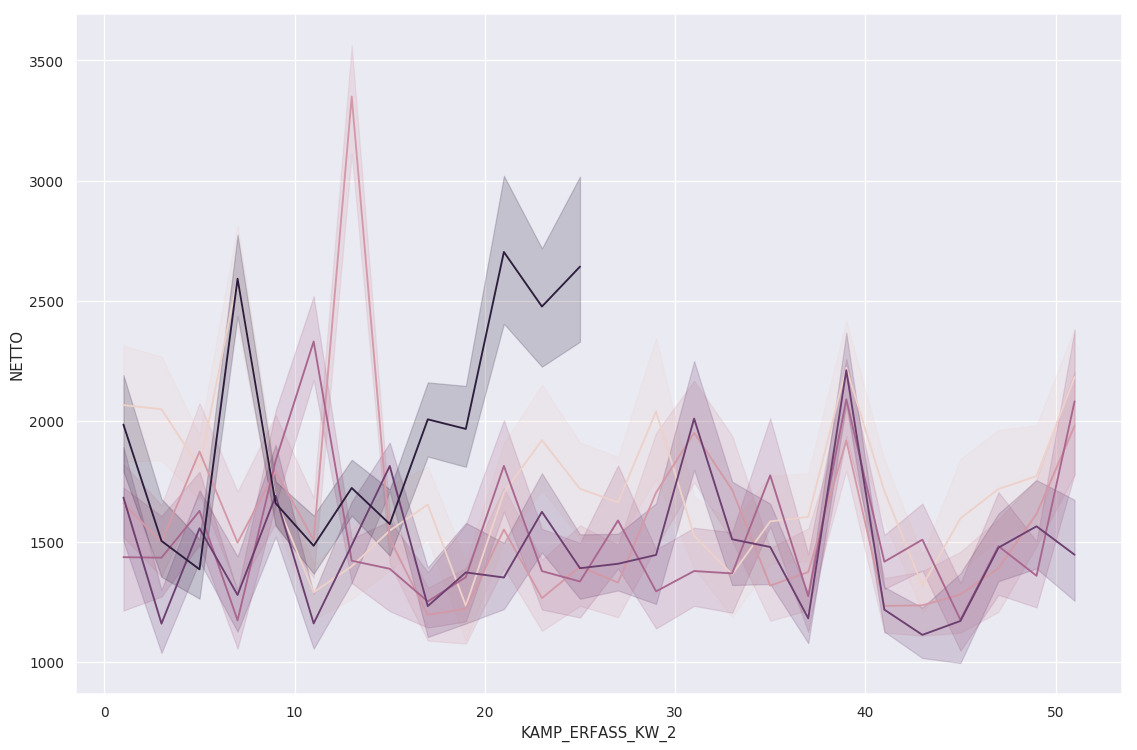

In [17]:
sns.lineplot(x=data.KAMP_ERFASS_KW_2, y=data.NETTO, hue=data.KAMP_ERFASS_JAHR, legend=False)

### Netto Reservation und Aushang per Endkunde und KW2

In [18]:
from concurrent.futures import ProcessPoolExecutor

def sum_calc(param):
    (df, col_year, col_week) = param
    return (df.groupby(['ENDKUNDE_NR', col_year, col_week], observed=False, as_index=False)[['NETTO']].agg('sum'))

with time_log('calculating sums'):
    with ProcessPoolExecutor(max_workers=2) as executor:
        (data_res, data_aus) = tuple(executor.map(sum_calc, [(data, 'KAMP_ERFASS_JAHR', 'KAMP_ERFASS_KW_2'), 
                                                             (data, 'KAMP_BEGINN_JAHR', 'KAMP_BEGINN_KW_2')]))

    data_by_week = (data_res.merge(data_aus,  
                                   left_on=['ENDKUNDE_NR', 'KAMP_ERFASS_JAHR', 'KAMP_ERFASS_KW_2'], 
                                   right_on=['ENDKUNDE_NR', 'KAMP_BEGINN_JAHR', 'KAMP_BEGINN_KW_2'], 
                                   how='outer', suffixes=('_res', '_aus'))
                            .rename({'KAMP_ERFASS_JAHR': 'Jahr', 'KAMP_ERFASS_KW_2': 'Kw', 'NETTO_res': 'Res', 'NETTO_aus': 'Aus'}, 
                                    axis='columns'))

    data_by_week = (data_by_week.fillna({'Jahr': data_by_week.KAMP_BEGINN_JAHR, 'Kw': data_by_week.KAMP_BEGINN_KW_2, 'Res': 0, 'Aus': 0})
                                .drop(['KAMP_BEGINN_JAHR', 'KAMP_BEGINN_KW_2'], axis='columns')
                                .sort_values(['Jahr', 'ENDKUNDE_NR', 'Kw'])
                                .reset_index(drop=True))

store_bin(data_by_week, 'bd_by_week.feather')

2019-06-27 10:24:40 [INFO] Finished calculating sums in 136.21s (22.57s CPU)
2019-06-27 10:24:40 [INFO] Writing to file /home/pa/data/bd_by_week.feather
2019-06-27 10:24:40 [INFO] Written 87.0 MB
2019-06-27 10:24:40 [INFO] Finished storing binary file in 0.34s (1.57s CPU)


In [11]:
data_by_week = load_bin('bd_by_week.feather')

2019-05-08 13:54:45 [INFO] Reading from file /home/pa/data/bd_by_week.feather
2019-05-08 13:54:45 [INFO] Finished loading binary file in 0.07s (0.12s CPU)


In [19]:
desc_col(data_by_week, det=True)

,DTYPE,NULLS,UNIQUE,MEM,RANGE
ENDKUNDE_NR,category,0/4553822,25021,9.5 MB,"[100034,656817]"
Jahr,category,0/4553822,7,4.3 MB,"[2015,2021]"
Kw,category,0/4553822,26,4.3 MB,"[1,51]"
Res,float64,0/4553822,20875,34.7 MB,"[0.0,6765906.0]"
Aus,float64,0/4553822,20864,34.7 MB,"[0.0,1636724.0]"


In [20]:
data_non_zero = (data_by_week
                 .query('Res > 0 or Aus > 0')
                 .pipe(clean_up_categoricals))

ek_minmax = (data_non_zero
             .assign(Jahr_Kw = data_non_zero.Jahr.astype('str').str.cat(
                               data_non_zero.Kw.astype('str'), sep='_')
                               .str.replace(r'_(\d)$', r'_0\g<1>') # make Kw two digits for sorting
                               .astype('str'))
             .drop(['Kw', 'Jahr'], axis='columns')
             .groupby('ENDKUNDE_NR')
             .agg({'Res': 'sum', 'Aus': 'sum', 'Jahr_Kw': ['min', 'max']}))

In [21]:
cols = [f'{fld}_{agg}' for (fld, agg) in ek_minmax.columns.to_flat_index()]
ek_minmax.set_axis(labels=cols, axis='columns', inplace=True)

In [22]:
qgrid.set_grid_option('minVisibleRows', 1)
qgrid.set_grid_option('maxVisibleRows', 20)

qgrid.show_grid(ek_minmax)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

### Vollständige Daten per KW2

In [23]:
from concurrent.futures import ProcessPoolExecutor

def sum_calc(param):
    (df, col_year, col_week) = param
    return (df.groupby(['ENDKUNDE_NR', col_year, col_week], observed=True, as_index=False)[['NETTO']].agg('sum'))

with time_log('calculating sums'):
    with ProcessPoolExecutor(max_workers=2) as executor:
        (bd_res,bd_aus) = tuple(executor.map(sum_calc, [(bd, 'KAMP_ERFASS_JAHR', 'KAMP_ERFASS_KW_2'), 
                                                        (bd, 'KAMP_BEGINN_JAHR', 'KAMP_BEGINN_KW_2')]))

    bd_by_week = (bd_res.merge(bd_aus,  
                               left_on=['ENDKUNDE_NR', 'KAMP_ERFASS_JAHR', 'KAMP_ERFASS_KW_2'], 
                               right_on=['ENDKUNDE_NR', 'KAMP_BEGINN_JAHR', 'KAMP_BEGINN_KW_2'], 
                               how='outer', suffixes=('_res', '_aus'))
                        .rename({'KAMP_ERFASS_JAHR': 'Jahr', 'KAMP_ERFASS_KW_2': 'Kw', 'NETTO_res': 'Res', 'NETTO_aus': 'Aus'}, 
                                axis='columns'))

    bd_by_week = (bd_by_week.fillna({'Jahr': bd_by_week.KAMP_BEGINN_JAHR, 'Kw': bd_by_week.KAMP_BEGINN_KW_2, 'Res': 0, 'Aus': 0})
                            .drop(['KAMP_BEGINN_JAHR', 'KAMP_BEGINN_KW_2'], axis='columns')
                            .sort_values(['Jahr', 'ENDKUNDE_NR', 'Kw'])
                            .reset_index(drop=True))

store_bin(bd_by_week, 'bd_long_by_week.feather')

2019-06-27 10:28:13 [INFO] Finished calculating sums in 2.96s (5.29s CPU)
2019-06-27 10:28:13 [INFO] Writing to file /home/pa/data/bd_long_by_week.feather
2019-06-27 10:28:13 [INFO] Written 9.3 MB
2019-06-27 10:28:13 [INFO] Finished storing binary file in 0.04s (0.32s CPU)


In [24]:
bd_by_week = load_bin('bd_long_by_week.feather')

2019-06-27 10:28:22 [INFO] Reading from file /home/pa/data/bd_long_by_week.feather
2019-06-27 10:28:22 [INFO] Finished loading binary file in 0.01s (0.02s CPU)


In [25]:
desc_col(bd_by_week, det=True)

,DTYPE,NULLS,UNIQUE,MEM,RANGE
ENDKUNDE_NR,category,0/427729,41716,3.2 MB,"[100034,656817]"
Jahr,category,0/427729,15,418.5 KB,"[2007,2021]"
Kw,category,0/427729,26,419.2 KB,"[1,51]"
Res,float64,0/427729,33024,3.3 MB,"[0.0,6765906.0]"
Aus,float64,0/427729,33074,3.3 MB,"[0.0,1636724.0]"


In [26]:
qgrid.set_grid_option('minVisibleRows', 1)
qgrid.set_grid_option('maxVisibleRows', 20)

qgrid.show_grid(bd_by_week)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [27]:
qgrid.show_grid(bd.loc[(bd.ENDKUNDE_NR==483063) & (bd.KAMP_BEGINN_JAHR==2014) & (bd.KAMP_BEGINN_KW_2.isin([23, 45]))].transpose())

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

### New/leaving customers

In [28]:
bd_non_zero = (bd_by_week
                 .query('Res > 0 or Aus > 0')
                 .pipe(clean_up_categoricals))

ek_minmax = (bd_non_zero
             .assign(Jahr_Kw = bd_non_zero.Jahr.astype('float') + bd_non_zero.Kw.astype('float') / 53)
             .groupby('ENDKUNDE_NR')
             .agg({'Res': 'sum', 'Aus': 'sum', 'Jahr_Kw': ['min', 'max']}))

cols = [f'{fld}_{agg}' for (fld, agg) in ek_minmax.columns.to_flat_index()]
ek_minmax.set_axis(labels=cols, axis='columns', inplace=True)

ek_minmax = (ek_minmax
             .assign(Lifetime=ek_minmax.Jahr_Kw_max-ek_minmax.Jahr_Kw_min))

In [29]:
ek_minmax.reset_index(inplace=True)
store_bin(ek_minmax, 'bd_ek_minmax.feather')

2019-06-27 10:29:09 [INFO] Writing to file /home/pa/data/bd_ek_minmax.feather
2019-06-27 10:29:09 [INFO] Written 1.5 MB
2019-06-27 10:29:09 [INFO] Finished storing binary file in 0.01s (0.01s CPU)


In [30]:
ek_minmax.sort_values(['Jahr_Kw_max', 'Jahr_Kw_min'], inplace=True)

In [32]:
end_jahr = (np.rint(ek_minmax.Jahr_Kw_max).astype('int').value_counts().reset_index().sort_values('index')
            .reset_index(drop=True).set_axis(['end_jahr', 'cnt'], axis='columns', inplace=False))

start_jahr = (np.rint(ek_minmax.Jahr_Kw_min).astype('int').value_counts().reset_index().sort_values('index')
              .reset_index(drop=True).set_axis(['start_jahr', 'cnt'], axis='columns', inplace=False))

start_end_jahre = start_jahr.merge(end_jahr, left_on='start_jahr', right_on='end_jahr', how='outer', suffixes=('_start', '_end'))

start_end_jahre = (start_end_jahre.fillna({'start_jahr': start_end_jahre.end_jahr, 'cnt_start': 0, 'cnt_end': 0})
                                  .drop('end_jahr', axis='columns'))

start_end_jahre = start_end_jahre.assign(saldo=np.cumsum(start_end_jahre.cnt_start)-np.cumsum(start_end_jahre.cnt_end))

qgrid.show_grid(start_end_jahre)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [33]:
qgrid.show_grid(ek_minmax)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [34]:
import bokeh
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [35]:
p = figure(title="Endkunden: Lebensdauer vs. Umsatz/Jahr", x_axis_label='Lifetime', y_axis_label='Umsatz / Jahr', 
           plot_width=900, y_axis_type="log")

p.circle(y=ek_minmax.Aus_sum / ek_minmax.Lifetime, x=ek_minmax.Lifetime, size=4, line_color='navy')

show(p)

In [36]:
desc_col(ek_minmax, True)

,DTYPE,NULLS,UNIQUE,MEM,RANGE
ENDKUNDE_NR,category,0/31749,31749,1.8 MB,"[100034,656817]"
Res_sum,float64,0/31749,17683,496.1 KB,"[19.0,81046084.0]"
Aus_sum,float64,0/31749,17513,496.1 KB,"[0.0,80836626.0]"
Jahr_Kw_min,float64,0/31749,304,496.1 KB,"[2007.245283018868,2019.4716981132076]"
Jahr_Kw_max,float64,0/31749,303,496.1 KB,"[2008.3207547169811,2021.1698113207547]"
Lifetime,float64,0/31749,929,496.1 KB,"[0.0,12.075471698113233]"


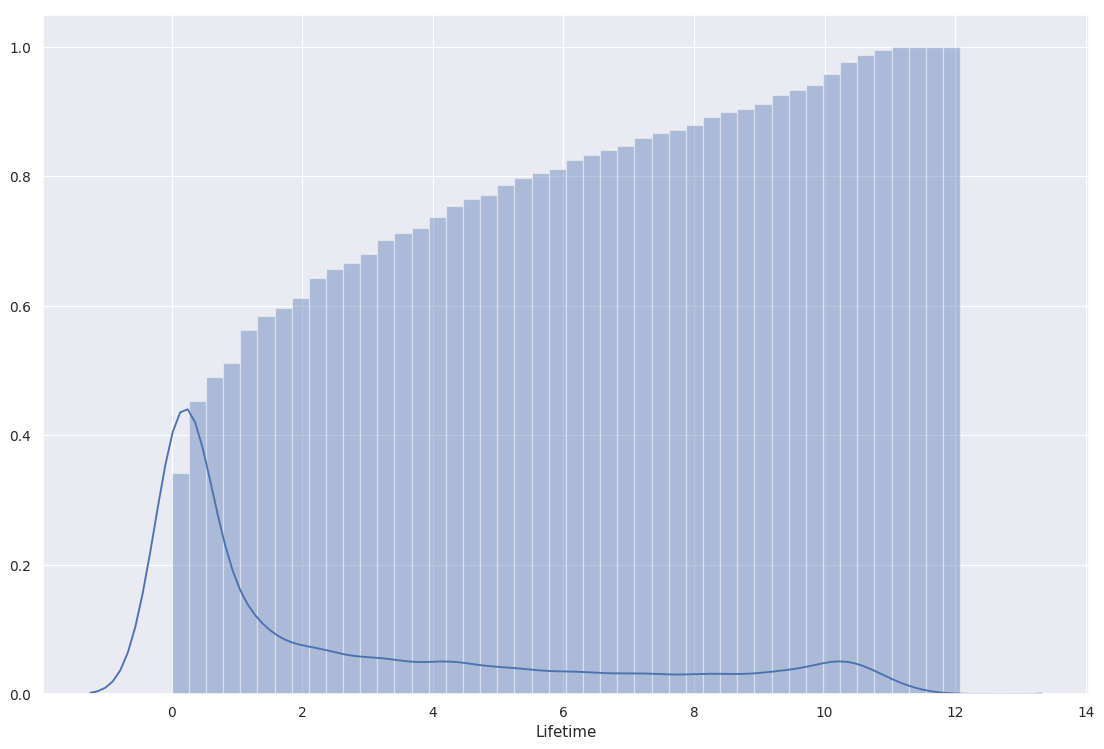

In [37]:
import seaborn as sns

sns.distplot(ek_minmax.Lifetime, hist_kws=dict(cumulative=True))

### Schlussfolgerungen

- 50% aller Kunden in den letzten 10 Jahren blieben nicht länger als ein Jahr
- Die Kunden-Lebensdauer hat Halbjahres-Peaks, wahrscheinlich wegen der Dispo-Eröffnungsdaten?
- Pro Jahr kommen und gehen zwischen 2000 und 3000 Kunden, "aktiv" sind zwischen 8000 und 9500

## Analyse Kunden vs. Vertragstypen

In [38]:
bd.columns

Index(['ENDKUNDE_NR', 'ENDKUNDE', 'EK_ABC', 'EK_BONI', 'EK_PLZ', 'EK_ORT',
       'EK_LAND', 'EK_HB_APG_KURZZ', 'EK_AKTIV', 'AGENTUR', 'AG_HAUPTBETREUER',
       'VERKAUFSBERATER', 'ENDKUNDE_BRANCHENGRUPPE_ID',
       'ENDKUNDE_BRANCHENGRUPPE', 'ENDKUNDE_NBRANCHENGRUPPE_ID',
       'ENDKUNDE_NBRANCHENGRUPPE', 'ENDKUNDE_BRANCHENKAT_ID',
       'ENDKUNDE_BRANCHENKAT', 'ENDKUNDE_NBRANCHENKAT_ID',
       'ENDKUNDE_NBRANCHENKAT', 'AUFTRAG_BRANCHENGRUPPE_ID',
       'AUFTRAG_BRANCHENGRUPPE', 'AUFTRAG_NBRANCHENGRUPPE_ID',
       'AUFTRAG_NBRANCHENGRUPPE', 'AUFTRAG_BRANCHENKAT_ID',
       'AUFTRAG_BRANCHENKAT', 'AUFTRAG_NBRANCHENKAT_ID',
       'AUFTRAG_NBRANCHENKAT', 'AGPS_NR', 'SEGMENT', 'KV_NR', 'KV_TYP',
       'KAMPAGNEN_STATUS', 'KAMPAGNE_ERFASSUNGSDATUM', 'KAMPAGNE_BEGINN',
       'AUFTRAGSART', 'RES_DAT', 'ANNULLATION_DATUM', 'AUSH_VON', 'DAUER',
       'VERTRAG', 'BRUTTO', 'NETTO', 'AGGLO', 'PF', 'KAMP_BEGINN_JAHR',
       'KAMP_BEGINN_KW', 'KAMP_BEGINN_KW_2', 'KAMP_BEGINN_KW_4',
    

In [39]:
bd.AUFTRAGSART.value_counts()

Kommerziell                1056551
Traffic Auftrag             147096
Vertragsvorschrift (OC)      84826
Politisch                    77659
langfristiger Vertrag        55828
Promotion                    43884
Logistik für Dritte          14677
Aushangauftrag Partner       12425
Karitativ                     9486
Freespace                     8476
Sponsoring                    5966
Eigenwerbung APG              5785
Goodwill                      1511
Name: AUFTRAGSART, dtype: int64

In [40]:
bd_auftr_art = bd.groupby('AUFTRAGSART').agg({'ENDKUNDE_NR': 'count', 'NETTO': 'sum', 'KV_NR': 'count'})

qgrid.show_grid(bd_auftr_art)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [56]:
bd.pivot_table(values='NETTO', index='AUFTRAGSART', columns='KAMP_ERFASS_JAHR', aggfunc=np.sum, margins=True, fill_value=-1).astype('int').sort_values('All')

KAMP_ERFASS_JAHR,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,All
AUFTRAGSART,,,,,,,,,,,,,,
Freespace,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,0
Goodwill,-1,0,6543,7939,4953,18668,2994,4762,4191,1732,17772,16741,5925,92220
Logistik für Dritte,-1,-1,0,0,4600,184578,31589,132394,479850,420927,418245,522661,239121,2433965
Aushangauftrag Partner,-1,30444,849600,791206,739514,1026394,1000669,439344,110412,92214,117954,150966,72198,5420915
Eigenwerbung APG,-1,-1,3897655,0,4670,1048532,0,360,133390,126540,1222454,72427,0,6506028
Vertragsvorschrift (OC),-1,324156,1042187,871336,2147664,1629103,1307660,1075297,773025,1001084,939051,1898591,1652511,14661665
Karitativ,-1,724644,1960077,1628917,1866012,2668615,2253943,2318474,2578634,3459117,2775404,3962032,2566566,28762435
Sponsoring,-1,348746,1097029,1087749,2340803,2588788,3282531,3450304,3740079,3906123,3671259,3432667,438138,29384216
Promotion,-1,1083041,5375644,4376195,3393104,3505266,5451654,3185928,3787542,4991362,4881049,9304271,1788199,51123255


### Schlussfolgerungen
- "Kommerziell" ist umsatzmässig führend (1.9 Mia von 2.7 Mia über 10 Jahre)
- Nächstwichtig sind "Traffic Auftrag" (336 Mio), "langfristiger Vertrag" (187 Mio) und "Politisch" (117 Mio)
- "Freespace" existiert erst seit 2017 und trägt nichts zum Umsatz bei
- "Eigenwerbung APG|SGA" ist sehr irregulär